## Practical 1
The goal of this parctical is to implement linear regression from scratch and to see how good the fit is wrt size of the training data. Optional problems implement ridge regresssion and lasso in sklearn, with polynomial features. The goal is then to see whichpolynomial degree is optimal using cross-validation.

In [1]:
import _pickle as cp
import numpy as np
X, y = cp.load(open('winequality-white.pickle', 'rb'))

In [3]:
N, D = X.shape
N_train = int(0.8 * N)
N_test = N - N_train
X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

(array([  20.,  163.,    0., 1457.,    0., 2198.,  880.,    0.,  175.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)

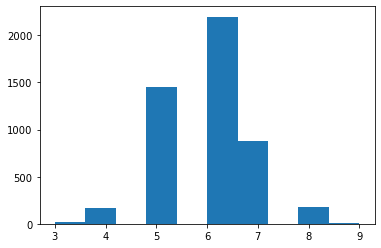

In [4]:
# Handin 1
import matplotlib.pyplot as plt

plt.hist(y)

In [5]:
# Handin 2
y_avg = y_train.mean()
train_mse = ((y_train - y_avg) * (y_train - y_avg)).mean()
print(f"MSE for training data is {train_mse}")
test_mse = ((y_test - y_avg) * (y_test - y_avg)).mean()
print(f"MSE for test data is {test_mse}")

MSE for training data is 0.7767772386501117
MSE for test data is 0.8138573000045535


In [6]:
mean = X_train.mean(axis=0)
std = np.sqrt(((X_train - mean)*(X_train - mean)).mean(axis=0))
mean, std

(array([6.85427514e+00, 2.78390761e-01, 3.34892802e-01, 6.42623788e+00,
        4.58213374e-02, 3.53263144e+01, 1.38513272e+02, 9.94040729e-01,
        3.18647524e+00, 4.89055641e-01, 1.05115799e+01]),
 array([8.39100902e-01, 9.95630176e-02, 1.24249975e-01, 5.06377532e+00,
        2.16660282e-02, 1.71004677e+01, 4.23956179e+01, 2.97972269e-03,
        1.49949475e-01, 1.12992053e-01, 1.22536544e+00]))

In [7]:
X_train_st = (X_train - mean)/std
X_test_st = (X_test - mean)/std
X_train_st, X_test_st

(array([[ 0.88871893, -0.38559258,  0.84593335, ..., -0.84345239,
         -1.05366384,  0.88824123],
        [ 0.05449268,  1.32186873, -0.0393787 , ...,  0.09019543,
          0.27386315, -0.90714153],
        [ 3.74892322, -0.78734818,  0.44351878, ..., -1.24358716,
         -0.61115484, -0.09105846],
        ...,
        [ 1.24624447,  0.71923533, -0.76372492, ..., -1.04351977,
          0.89337574, -0.00945015],
        [-1.1372591 ,  0.61879643, -0.28082744, ..., -0.643385  ,
         -1.31916923,  1.21467446],
        [-0.66055839,  0.21704082, -0.76372492, ...,  0.22357369,
         -0.16864585, -0.82553323]]),
 array([[-0.18385767,  0.61879643,  1.65076248, ..., -0.97683064,
          0.62787034, -1.39679138],
        [ 1.24624447,  0.51835753, -0.44179327, ..., -0.24325022,
         -0.96516204, -1.39679138],
        [ 0.41201822,  0.31747972,  0.12158713, ..., -0.30993935,
          0.36236495, -0.66231661],
        ...,
        [-0.66055839,  2.02494103, -2.37338318, ...,  

In [9]:
w = ((np.linalg.inv((X_train_st.transpose())@X_train_st))@X_train_st.transpose())@y_train
w

array([ 0.05703657, -0.18338422, -0.00404067,  0.40909728, -0.00817517,
        0.05929295, -0.00356634, -0.43693678,  0.09873812,  0.06533251,
        0.24249545])

In [10]:
b = y_train.mean()
b

5.878764675855028

In [11]:
y_train_pred = X_train_st@w + b
y_test_pred = X_test_st@w + b
len(y_train_pred)

3918

In [12]:
y_train, y_train_pred

(array([6., 5., 6., ..., 6., 6., 5.]),
 array([6.32918031, 5.31315852, 5.59097424, ..., 5.96922013, 6.2828131 ,
        5.4998735 ]))

In [13]:
# Handin 3
train_mse = ((y_train - y_train_pred) * (y_train - y_train_pred)).mean()
print(f"MSE for training data is {train_mse}")
test_mse = ((y_test - y_test_pred) * (y_test - y_test_pred)).mean()
print(f"MSE for test data is {test_mse}")

MSE for training data is 0.5639996173941925
MSE for test data is 0.56072920422927


In [14]:
def calculate_loss(X_tr, y_tr, X_ts, y_ts):
    m = X_tr.mean(axis=0)
    s = np.sqrt(((X_tr-m)*(X_tr-m)).mean(axis=0))
    X = (X_tr - m)/s
    X_t = (X_ts -m)/s
    w = np.linalg.inv(X.transpose()@X)@X.transpose()@y_tr
    b = y_tr.mean()
    y_pred = X@w + b
    y_pred_t = X_t@w + b
    mse = ((y_tr-y_pred)*(y_tr-y_pred)).mean()
    mse_t = ((y_ts-y_pred_t)*(y_ts-y_pred_t)).mean()
    return mse, mse_t
    


In the beginning, our model is overfitting since training loss is much lower than test loss.
The place where training loss increases can be clarified by the fact that variation in the training data is increasing.
By increasing the training data, we prevent overfitting which can be verified by observing that train and test loss
are similar.
I would guess that at that point, our model is underfitting, i.e. not capable of representing the data, since loss is still
pretty large (compared to loss of taking y_pred=y_train.mean())



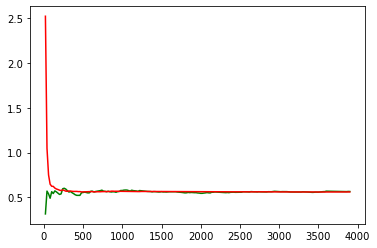

In [15]:
# Handin 4
mse_train = {}
mse_test = {}
for i in range(20, len(X_train), 20):
    mse_train[i], mse_test[i] = calculate_loss(X_train[:i], y_train[:i], X_test, y_test)
plt.plot(mse_train.keys(), mse_train.values(), c='green')
plt.plot(mse_test.keys(), mse_test.values(), c='red')

print("""
In the beginning, our model is overfitting since training loss is much lower than test loss.
The place where training loss increases can be clarified by the fact that variation in the training data is increasing.
By increasing the training data, we prevent overfitting which can be verified by observing that train and test loss
are similar.
I would guess that at that point, our model is underfitting, i.e. not capable of representing the data, since loss is still
pretty large (compared to loss of taking y_pred=y_train.mean())
""")

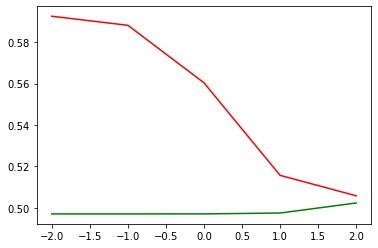

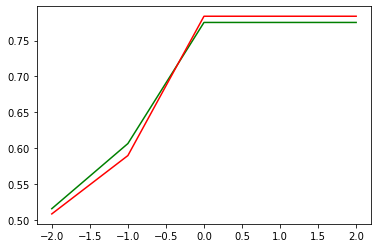

In [35]:
# Optional

from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train_, X_valid, y_train_, y_valid = train_test_split(X_train, y_train, test_size=0.2)
train_mse_ridge = {}
valid_mse_ridge = {}
train_mse_lasso = {}
valid_mse_lasso = {}

for i in range(-2,3):
    pipe_ridge = Pipeline([('scaler', StandardScaler()), ('preprocessor', PolynomialFeatures(degree=2)),
                           ('estimator', Ridge(alpha=10**i))])
    pipe_lasso = Pipeline([('scaler', StandardScaler()), ('preprocessor', PolynomialFeatures(degree=2)),
                           ('estimator', Lasso(alpha=10**i))])

    pipe_ridge.fit(X_train_, y_train_)
    pipe_lasso.fit(X_train_, y_train_)

    y_train_ridge = pipe_ridge.predict(X_train_)
    y_valid_ridge = pipe_ridge.predict(X_valid)
    y_train_lasso = pipe_lasso.predict(X_train_)
    y_valid_lasso = pipe_lasso.predict(X_valid)
    
    train_mse_ridge[i] = mean_squared_error(y_train_, y_train_ridge)
    valid_mse_ridge[i] = mean_squared_error(y_valid, y_valid_ridge)
    train_mse_lasso[i] = mean_squared_error(y_train_, y_train_lasso)
    valid_mse_lasso[i] = mean_squared_error(y_valid, y_valid_lasso)
    
plt.plot(train_mse_ridge.keys(), train_mse_ridge.values(), c='green')
plt.plot(valid_mse_ridge.keys(), valid_mse_ridge.values(), c='red')
plt.show()
plt.plot(train_mse_lasso.keys(), train_mse_lasso.values(), c='green')
plt.plot(valid_mse_lasso.keys(), valid_mse_lasso.values(), c='red')
plt.show()

In [17]:
print("The conclusion would be that we should pick alpha=100 for ridge regression and alpha=-0.1 for lasso.")

The conclusion would be that we should pick alpha=100 for ridge regression and alpha=-0.1 for lasso.


In [37]:
pipe_ridge = Pipeline([('scaler', StandardScaler()), ('preprocessor', PolynomialFeatures(degree=2)),
                           ('estimator', Ridge(alpha=100))])
pipe_lasso = Pipeline([('scaler', StandardScaler()), ('preprocessor', PolynomialFeatures(degree=2)),
                           ('estimator', Lasso(alpha=0.1))])

pipe_ridge.fit(X_train, y_train)
pipe_lasso.fit(X_train, y_train)

y_train_ridge = pipe_ridge.predict(X_train)
y_test_ridge = pipe_ridge.predict(X_test)
y_train_lasso = pipe_lasso.predict(X_train)
y_test_lasso = pipe_lasso.predict(X_test)
   
train_mse_ridge= mean_squared_error(y_train, y_train_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_ridge)
train_mse_lasso = mean_squared_error(y_train, y_train_lasso)
test_mse_lasso = mean_squared_error(y_test, y_test_lasso)
    
print(f"MSE for train data using ridge regression is {train_mse_ridge}")
print(f"MSE for test data using ridge regression is {test_mse_ridge}")
print(f"MSE for train data using lasso regression is {train_mse_lasso}")
print(f"MSE for test data using lasso regression is {test_mse_lasso}")

MSE for train data using ridge regression is 0.4993481831145306
MSE for test data using ridge regression is 0.5119067544028981
MSE for train data using lasso regression is 0.601218527901034
MSE for test data using lasso regression is 0.6100892531353018


For 1th degree polynomian, negative MSE is -0.5700061668353745
For 2th degree polynomian, negative MSE is -0.5484530561526784
For 3th degree polynomian, negative MSE is -3.4363791218452313
For 4th degree polynomian, negative MSE is -420.4402111189232
For 5th degree polynomian, negative MSE is -21375.6639439444
For 6th degree polynomian, negative MSE is -866281.3510861587


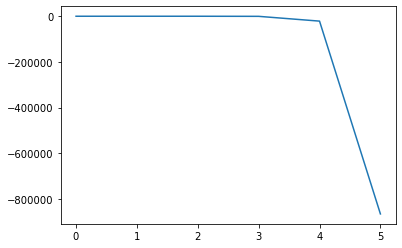

In [32]:
# Super Optional

from sklearn.model_selection import cross_val_score

avg_scores=[0]
for i in range(1, 7):
    pipe = Pipeline([('scaler', StandardScaler()), ('preprocessor', PolynomialFeatures(degree=i)),
                           ('estimator', Ridge(alpha=100))])
    cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"For {i}th degree polynomian, negative MSE is {cv_scores.mean()}")
    avg_scores.append(cv_scores.mean())

    
plt.plot(avg_scores[1:])

In [34]:
print("We can infer that the optimal degree polynomial is 2.")

We can infer that the optimal degree polynomial is 2.
